In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [0]:
X,y = make_blobs(n_samples=60,n_features=2,centers=3,random_state=20)  ### X is the data and y are cluster labels. 

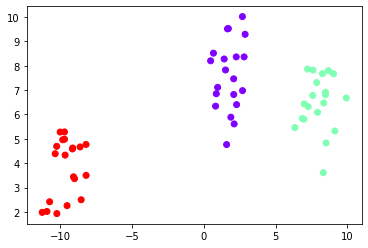

In [70]:
plt.scatter(X[:,0],X[:,1],c=y,cmap ='rainbow')
plt.show()

In [0]:
class Dbscan(object):
  def __init__(self,x,esp,minpt,p=2):
    self.x=x
    self.esp = esp
    self.minpt = minpt
    self.p = p
  def dis(self):
    '''
    This function takes two ndarrays as x, y with same no of atributes (may not be of same size) and the parameter p the degree of minkowski distance.

    p = 2 Euclidean distance.
    p = 1 Manhattan distance
    '''
    distance = np.zeros((np.shape(self.x)[0],np.shape(self.x)[0]))
    for i in range(np.shape(self.x)[0]):
      for j in range(i+1):
        distance[i,j] = np.sum((np.abs(self.x[i,:]-self.x[j,:]))**self.p)**(1/self.p)
        distance[j,i] = distance[i,j]
    return(distance)
    
  def neighbour(self,i):
    '''
    This function takes the index of a point as input
    Returns ndarrays of indices of points inside eps neghbourhood of that point
    '''
    distance = self.dis()
    neigh = np.where(distance[i,]<self.esp)[0]
    return neigh
  
  def cluster(self):
    '''
    This attribute gives the desired cluster
    '''
    clust = np.zeros(np.shape(self.x)[0])
    clusters = 1
    for i in range(int(np.shape(self.x)[0])):
      if clust[i] == 0:
        neib = self.neighbour(i)
        neib = [p for p in neib if clust[p]==0]
        if len(neib)>= self.minpt:
          for j in neib:
            clust[j] = clusters
        else:
          clust[i] = -1
        clusters += 1
    return clust
        



In [71]:
m = Dbscan(X,4,3)
result = m.cluster()
result

array([1., 2., 1., 1., 3., 3., 2., 3., 1., 2., 1., 2., 2., 3., 1., 2., 1.,
       1., 2., 2., 1., 3., 3., 2., 1., 2., 1., 2., 3., 2., 2., 3., 2., 3.,
       2., 2., 2., 3., 2., 3., 3., 1., 2., 3., 2., 3., 3., 1., 1., 3., 3.,
       3., 3., 1., 1., 1., 1., 3., 1., 1.])

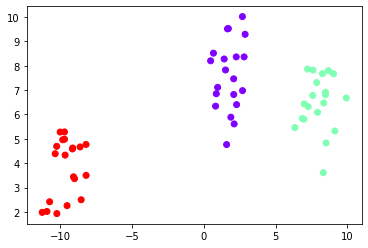

In [72]:
plt.scatter(X[:,0],X[:,1],c=result,cmap ='rainbow')
plt.show()